In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

print(admissions.head())

        gpa         gre  actual_label
0  3.177277  594.102992             0
1  3.412655  631.528607             0
2  2.728097  553.714399             0
3  3.093559  551.089985             0
4  3.141923  537.184894             0


In [8]:
# 洗牌
import numpy as np
np.random.seed(8)
admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)
shuffled_index = np.random.permutation(admissions.index)
#print shuffled_index
shuffled_admissions = admissions.loc[shuffled_index]

train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]

print(shuffled_admissions.head())

          gpa         gre  actual_label
260  3.414036  577.665610             0
173  2.932147  564.798764             0
256  2.674040  599.895858             0
167  2.923581  622.524665             0
400  3.414376  704.934217             1


In [11]:
train

,gpa,gre,actual_label
351,3.530598,586.149180,0
299,2.692225,795.114106,0
123,3.119102,548.824829,0
93,3.310185,505.381002,0
85,3.336941,489.931757,0
...,...,...,...
253,3.248228,620.370008,0
367,3.282647,601.910011,0
458,3.623912,430.964848,1
82,3.230802,628.416110,0


In [25]:
shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]
train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])

labels = model.predict(test[["gpa"]])
print(labels)
test["predicted_label"] = labels
print(test)
matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
print(correct_predictions)
accuracy = len(correct_predictions) / float(len(test))
print(accuracy)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1]
          gpa         gre  actual_label  predicted_label
78   3.235723  455.925155             0                0
249  3.467048  571.414645             0                0
454  3.655778  575.461259             1                1
264  3.150268  444.223279             0                0
494  3.063861  626.018986             1                0
..        ...         ...           ...              ...
263  3.103706  634.104699             0                0
71   3.691417  496.273937             0                1
8    3.562482  590.340371             0                1
151  3.052047  635.292374             0                0
341  3.612613  563.161628             0                1

[129 rows x 4 columns]
          gpa         gre  ac

<ipython-input-25-839106f93679>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_label"] = labels


In [26]:
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])
labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels
matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
accuracy = len(correct_predictions) / len(test)
true_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 1)
true_positives = len(test[true_positive_filter])
false_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 1)
false_negatives = len(test[false_negative_filter])

sensitivity = true_positives / float((true_positives + false_negatives))
print(sensitivity)

false_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 0)
false_positives = len(test[false_positive_filter])
true_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 0)
true_negatives = len(test[true_negative_filter])

specificity = (true_negatives) / float((false_positives + true_negatives))
print(specificity)

0.30357142857142855
0.8904109589041096


<ipython-input-26-7a9b4ae3c120>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_label"] = labels


[1.74140007 0.74140007 0.71006234 0.69856695 0.6593254  0.65056997
 0.64384835 0.64059449 0.62673893 0.61709484 0.56122708 0.55795942
 0.5325036  0.52806595 0.52419854 0.50076523 0.49248265 0.46647944
 0.46361954 0.44642479 0.44528771 0.43895454 0.4250053  0.39446157
 0.39355075 0.38857173 0.38474611 0.38462571 0.38281223 0.36859971
 0.35925365 0.35885323 0.34834678 0.34229436 0.33922005 0.32134547
 0.31850928 0.30877239 0.30556117 0.30555187 0.3051117  0.26827871
 0.26788092 0.25468242 0.24833222 0.20319725 0.195358   0.11383141]


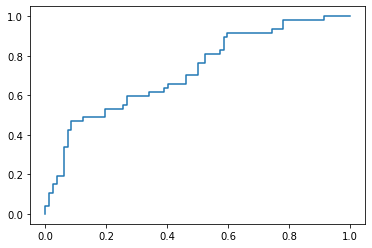

In [20]:
import matplotlib.pyplot as plt
from sklearn import metrics

probabilities = model.predict_proba(test[["gpa"]])
fpr, tpr, thresholds = metrics.roc_curve(test["actual_label"], probabilities[:,1])
print (thresholds)
plt.plot(fpr, tpr)
plt.show()

In [28]:
tpr

array([0.        , 0.0212766 , 0.04255319, 0.04255319, 0.10638298,
       0.10638298, 0.14893617, 0.14893617, 0.19148936, 0.19148936,
       0.34042553, 0.34042553, 0.42553191, 0.42553191, 0.46808511,
       0.46808511, 0.4893617 , 0.4893617 , 0.53191489, 0.53191489,
       0.55319149, 0.55319149, 0.59574468, 0.59574468, 0.61702128,
       0.61702128, 0.63829787, 0.63829787, 0.65957447, 0.65957447,
       0.70212766, 0.70212766, 0.76595745, 0.76595745, 0.80851064,
       0.80851064, 0.82978723, 0.82978723, 0.89361702, 0.89361702,
       0.91489362, 0.91489362, 0.93617021, 0.93617021, 0.9787234 ,
       0.9787234 , 1.        , 1.        ])

In [19]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test[["gpa"]])

# Means we can just use roc_auc_curve() instead of metrics.roc_auc_curve()
auc_score = roc_auc_score(test["actual_label"], probabilities[:,1])
print(auc_score)

0.7210690192008302
